## Group Assignment - Predict survival on Titanic

**Instructions**

The task is to predict survival on board of the Titanic:

https://www.kaggle.com/c/titanic/

 
The key column is the Age, which has some missing values, so you will need some imputation strategy.

 

**Scoring for this assignment goes as follows:**

1 point for the preliminary data analysis (proper data reading, basic statistics, visualization)

2 points for feature engineering (imputation of missing values in the Age column, creation of new features)

1 point for the machine learning process (algorithm selection, final test score)

**Rules:**

Datasets train.csv and test.csv from https://www.kaggle.com/c/titanic/data must be used, no other sources
You cannot use machine learning algorithms for the feature engineering part, only manual techniques. This rules out KNN for imputation, Deep Learning, sklearn.preprocessing.Imputer, fancyimpute, missingno, and similar
The format of the delivery *must*:

- be a Jupyter notebook
- whose name should contain the surnames of the students in the group
- run, top to bottom, without errors on a capable computer with Python 3.6
- If you don't manage to get it working, document what approaches did you try, and explain the errors. Do not deliver an unfinished notebook without explanations.

 

Good luck!



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
sns.set()

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Set-up

In [4]:
# We begin by importing the data.

titanic = pd.read_csv('train.csv', index_col= 'PassengerId')

# Next, we check the head, info and describe

titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the kaggle challenge page, we can retrieve the defenition of the variables

Survived: Survival, 0 = No, 1 = Yes

Pclass: Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd

Sex: Sex

Age: Age in years

Sibsp: number of siblings / spouses aboard the Titanic

Parch:number of parents / children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

The first thing to do is to make sure that numerical and categorical variable have the correct datatype. The categorical variables are: Survived, Pclass, Sex, Embarked

In [8]:
titanic["Pclass"] = titanic["Pclass"].astype(object)

In [9]:
titanic.describe().round(2)

,Survived,Age,SibSp,Parch,Fare
count,891.00,714.00,891.00,891.00,891.00
mean,0.38,29.70,0.52,0.38,32.20
std,0.49,14.53,1.10,0.81,49.69
min,0.00,0.42,0.00,0.00,0.00
25%,0.00,20.12,0.00,0.00,7.91
50%,0.00,28.00,0.00,0.00,14.45
75%,1.00,38.00,1.00,0.00,31.00
max,1.00,80.00,8.00,6.00,512.33


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null object
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 83.5+ KB


We can see that Age and Cabin have a lot of missing observetion, but we will come back to it later.


## Exploratory Data Analysis

For the moment, we focus on the Survived variable, which is the variable we are trying to predict and see how it is affected by ther variables


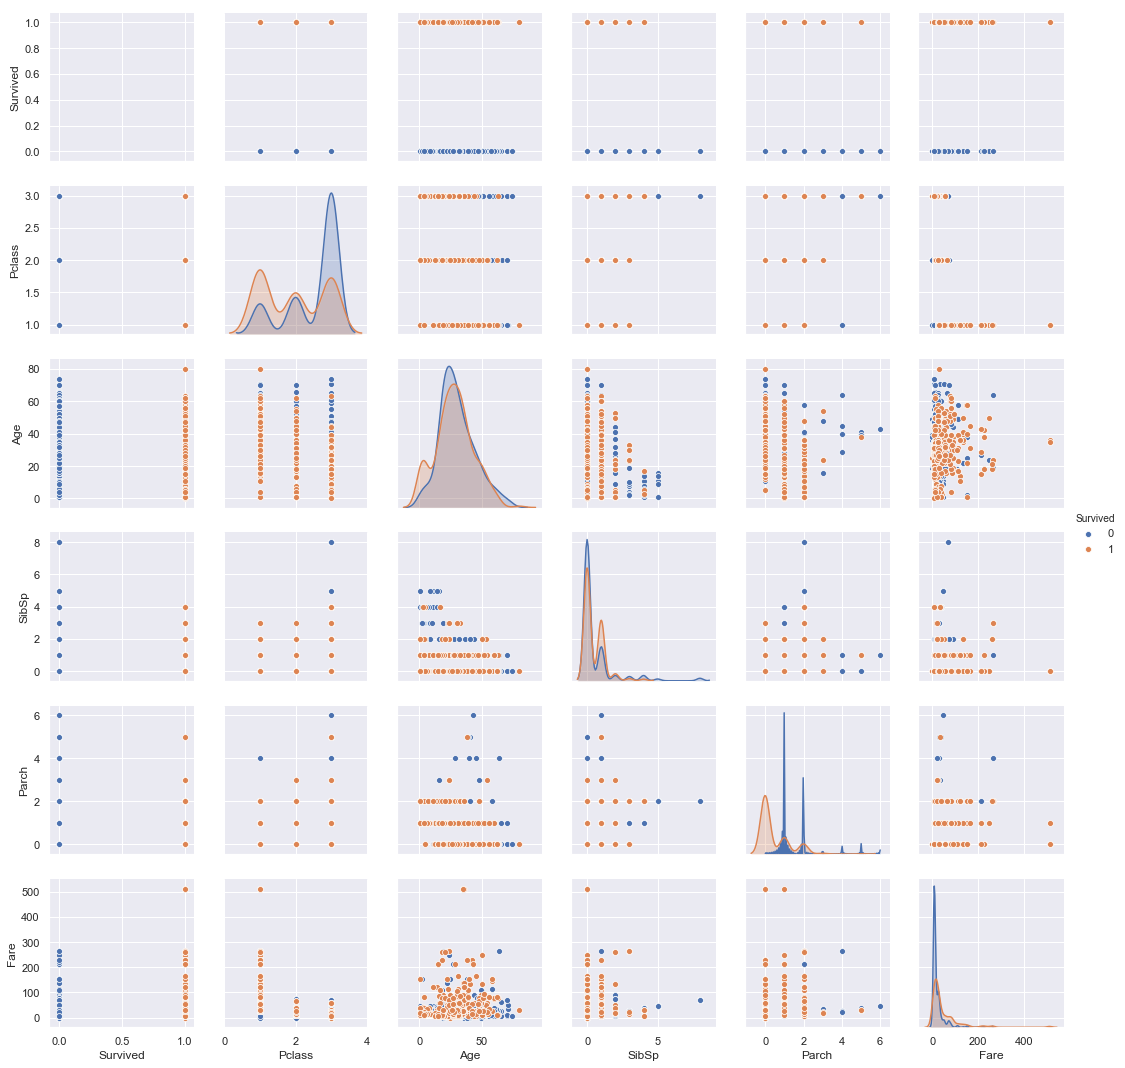

In [11]:
# We run a pairplot just to get a sense for the variables and distributions

sns.pairplot(data = titanic, hue = 'Survived')

In [12]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
titanic["Survived"].mean() #average survival rate

0.3838383838383838

** Survived vs. Sex **

In [14]:
titanic.groupby("Sex", as_index=False)["Survived"].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


** Survived vs. Fare **

First, we look at the distribution of Fare



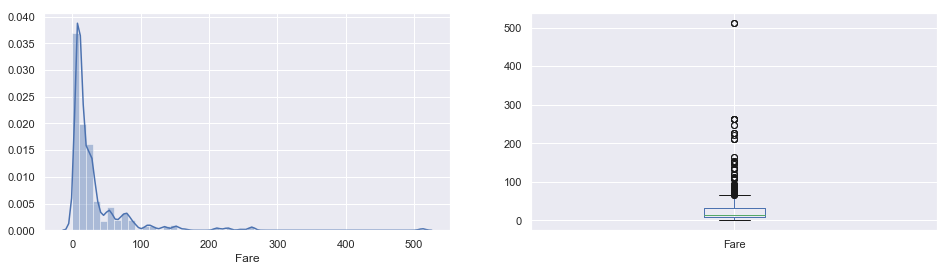

In [15]:
fig, ax = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(titanic['Fare'], ax = ax[0]);
titanic["Fare"].plot.box(ax = ax[1]);

We can see that it is very skewed and has a large number of outliers.

In [16]:
titanic.groupby("Survived", as_index=False)["Fare"].median() 
# We are considering the average because it is robust to outliers

,Survived,Fare
0,0,10.5
1,1,26.0


From this table, it looks like that those who survived on payed a higher fare, more than double the fare payed by those who died.


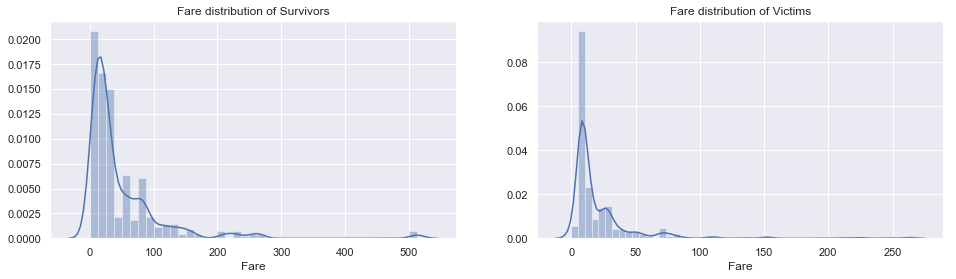

In [17]:
fig, ax = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(titanic["Fare"].loc[(titanic["Survived"]==1)] , 
             ax=ax[0]).set_title("Fare distribution of Survivors");
sns.distplot(titanic["Fare"].loc[(titanic["Survived"]==0)] , 
             ax=ax[1]).set_title("Fare distribution of Victims");

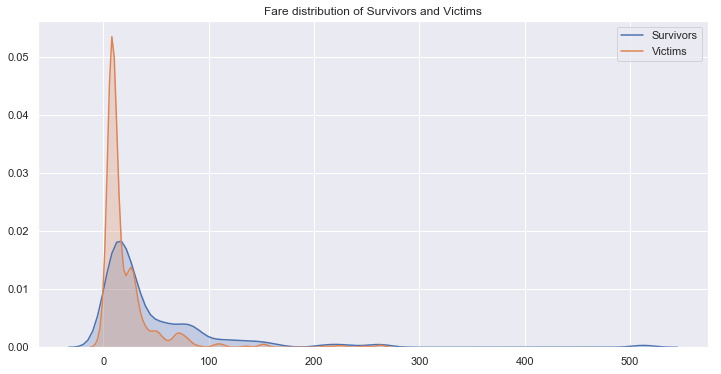

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(titanic["Fare"].loc[(titanic["Survived"]==1)], shade=True, label="Survivors");
sns.kdeplot(titanic["Fare"].loc[(titanic["Survived"]==0)], shade=True, label="Victims");
plt.title("Fare distribution of Survivors and Victims");

As you can see, the victims fare distribution is more concentrated on the lower fares.


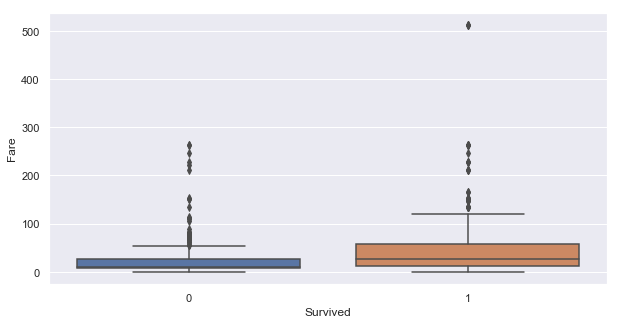

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Survived", y="Fare", data=titanic, ax=ax);

In [20]:
titanic['Survived'].corr(titanic['Fare'])

0.25730652238496227

** Survived vs. Pclass **

In [21]:
titanic.groupby("Pclass", as_index=False)["Survived"].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


** Survived vs. Age **

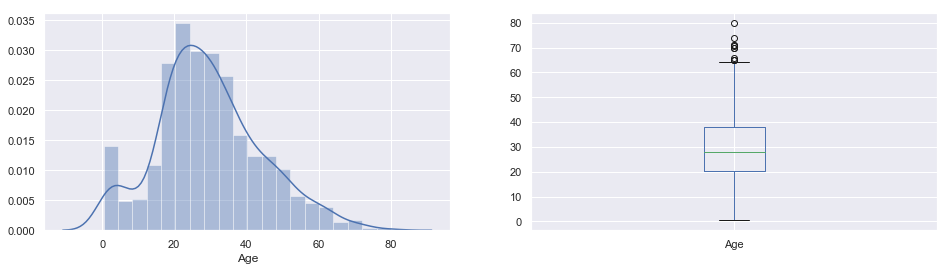

In [22]:
fig, ax = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(titanic["Age"].loc[titanic["Age"].notna()], ax=ax[0]);
titanic["Age"].plot.box(ax = ax[1]);

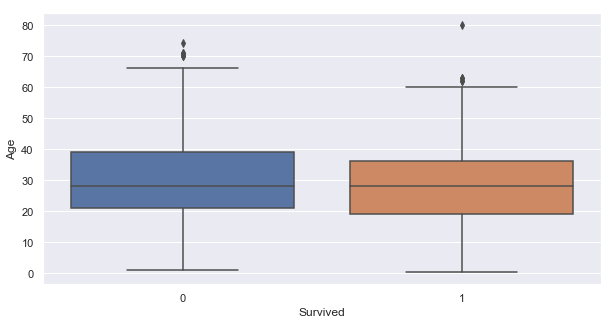

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Survived", y="Age", data=titanic, ax=ax);

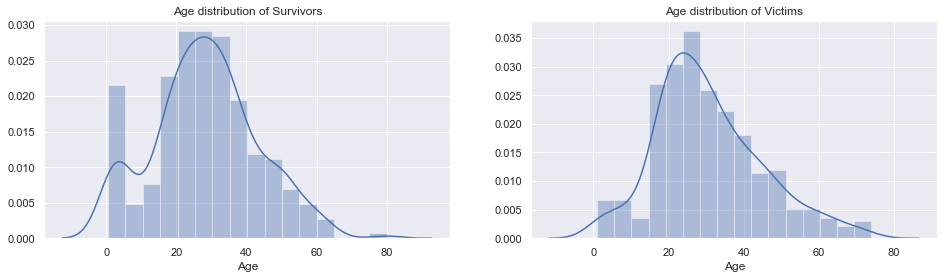

In [24]:
fig, ax = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(titanic["Age"].loc[(titanic["Survived"]==1) & (titanic["Age"].notna())] , 
             ax=ax[0]).set_title("Age distribution of Survivors");
sns.distplot(titanic["Age"].loc[(titanic["Survived"]==0) & (titanic["Age"].notna())] , 
             ax=ax[1]).set_title("Age distribution of Victims");

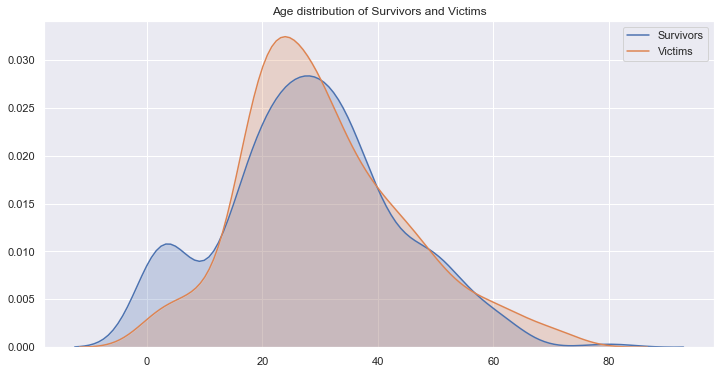

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==1) & (titanic["Age"].notna())], 
            shade=True, label="Survivors");
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==0) & (titanic["Age"].notna())], 
            shade=True, label="Victims");
plt.title("Age distribution of Survivors and Victims");

In [26]:
titanic.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

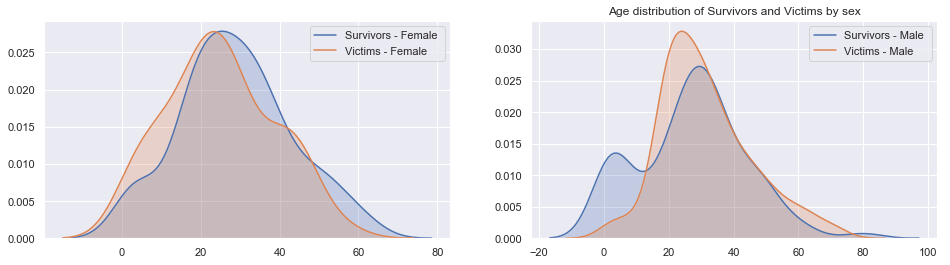

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==1) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")], 
            shade=True, label="Survivors - Female ", ax=ax[0]);
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==0) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")], 
            shade=True, label="Victims - Female", ax=ax[0]);
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==1) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")], 
            shade=True, label="Survivors - Male ", ax=ax[1]);
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==0) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")], 
            shade=True, label="Victims - Male", ax=ax[1]);
plt.title("Age distribution of Survivors and Victims by sex");

We can see that there were more male children who survived, compared to those who died, than female childred. The latter were more likely to die than to survive. Instead teeenage and young adult women had more chances to survive than teenage and young adult men.



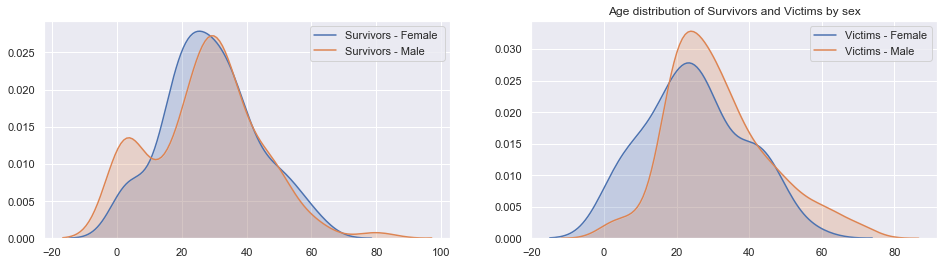

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==1) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")], 
            shade=True, label="Survivors - Female ", ax=ax[0]);
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==0) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")], 
            shade=True, label="Victims - Female", ax=ax[1]);
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==1) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")], 
            shade=True, label="Survivors - Male ", ax=ax[0]);
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==0) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")], 
            shade=True, label="Victims - Male", ax=ax[1]);
plt.title("Age distribution of Survivors and Victims by sex");

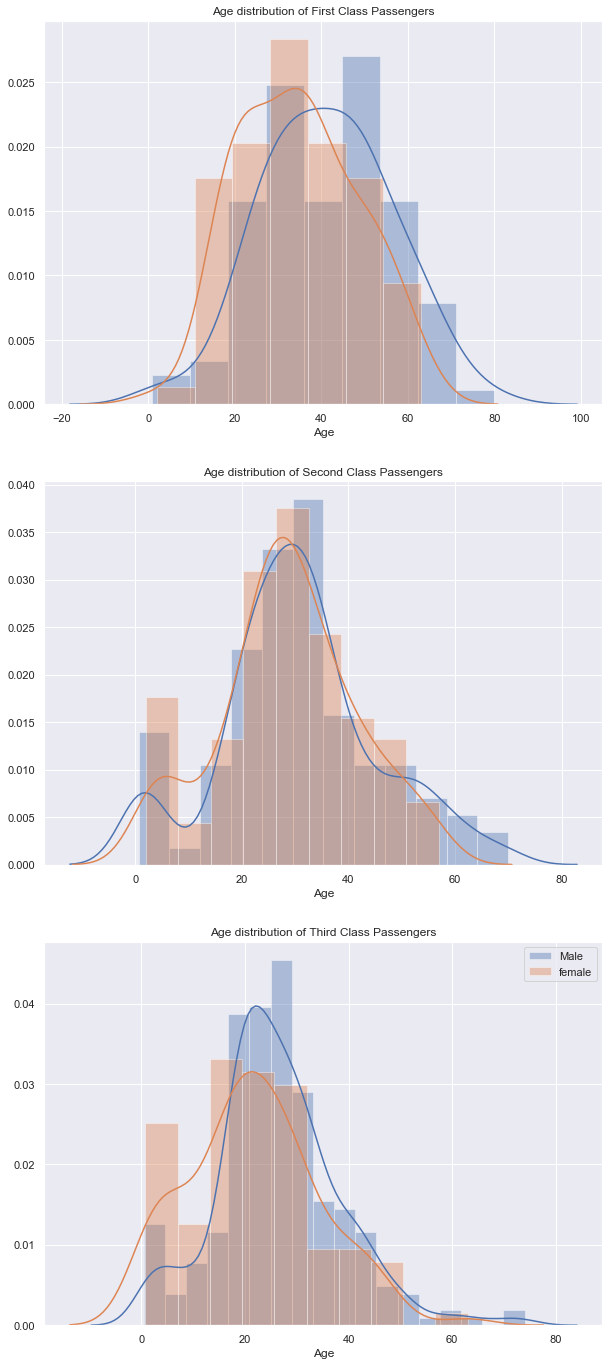

In [29]:

fig, ax = plt.subplots(nrows=3,figsize=(10,24))
sns.distplot(titanic["Age"].loc[(titanic["Pclass"]==1) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")] , 
             label="Male", ax=ax[0]).set_title("Age distribution of First Class Passengers");
sns.distplot(titanic["Age"].loc[(titanic["Pclass"]==1) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")] , 
             label="Female", ax=ax[0]).set_title("Age distribution of First Class Passengers");



sns.distplot(titanic["Age"].loc[(titanic["Pclass"]==2) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")] , 
             label="Male", ax=ax[1]).set_title("Age distribution of Second Class Passengers");
sns.distplot(titanic["Age"].loc[(titanic["Pclass"]==2) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")] , 
             label="female", ax=ax[1]).set_title("Age distribution of Second Class Passengers");



sns.distplot(titanic["Age"].loc[(titanic["Pclass"]==3) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")] , 
             label="Male", ax=ax[2]).set_title("Age distribution of Third Class Passengers");
sns.distplot(titanic["Age"].loc[(titanic["Pclass"]==3) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")] , 
             label="female", ax=ax[2]).set_title("Age distribution of Third Class Passengers");

plt.legend()
plt.show()

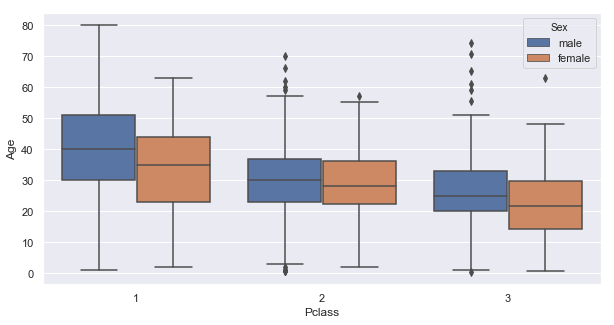

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Pclass", y="Age", hue="Sex", data=titanic, ax=ax);

In [31]:
titanic.groupby(["Sex", "Pclass"])["Age"].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In this way, I can fill in the missing age depending on the sex and the passenger class of the individual



In [32]:
filler = titanic.groupby(["Sex", "Pclass"], as_index=False)["Age"].median()

In [33]:
filler.set_index("Sex")

,Pclass,Age
Sex,,
female,1,35.0
female,2,28.0
female,3,21.5
male,1,40.0
male,2,30.0
male,3,25.0


In [34]:
titanic.groupby(["Sex","Pclass"])["Age"].transform("median")
#transform transforms the value in each cell into the argument, in this case the median. When applied in fillna, 
#it transform each cell, but change only the NaN ones

PassengerId
1      25.0
2      35.0
3      21.5
4      35.0
5      25.0
6      25.0
7      40.0
8      25.0
9      21.5
10     28.0
11     21.5
12     35.0
13     25.0
14     25.0
15     21.5
16     28.0
17     25.0
18     30.0
19     21.5
20     21.5
21     30.0
22     30.0
23     21.5
24     40.0
25     21.5
26     21.5
27     25.0
28     40.0
29     21.5
30     25.0
       ... 
862    30.0
863    35.0
864    21.5
865    30.0
866    28.0
867    28.0
868    40.0
869    25.0
870    25.0
871    25.0
872    35.0
873    40.0
874    25.0
875    28.0
876    21.5
877    25.0
878    25.0
879    25.0
880    35.0
881    28.0
882    25.0
883    21.5
884    30.0
885    25.0
886    21.5
887    30.0
888    35.0
889    21.5
890    40.0
891    25.0
Name: Age, Length: 891, dtype: float64

In [35]:
titanic["Age"] = titanic["Age"].fillna(titanic.groupby(["Sex","Pclass"])["Age"].transform("median"))

In [36]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null object
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 123.5+ KB


## Feature Engineering

Now we can prepare the feature matrix. First we need to drop the non numerical variables and the irrelevant ones.

We create one massive feature matric, which we then experiment with. 

In [38]:
feat = titanic.drop(columns=["Ticket", "Cabin", "Name", "Pclass", "Sex", "Embarked"])

In [39]:
feat.head()

,Survived,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,0,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,1,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,0,35.0,0,0,8.0500


Then we need to tranform the categorical variables into dummies, so that we can use them properly in the prediction

In [40]:
sex = pd.get_dummies(titanic['Sex'])
embark = pd.get_dummies(titanic['Embarked'])
pclass = pd.get_dummies(titanic['Pclass'])
pclass.columns = ["D1C", "D2C", "D3C"]

In [67]:
# Splitting the name data by punctuation

NameSplit = titanic['Name'].str.split('[,.]')
NameSplit.head()

PassengerId
1                          [Braund,  Mr,  Owen Harris]
2    [Cumings,  Mrs,  John Bradley (Florence Briggs...
3                           [Heikkinen,  Miss,  Laina]
4     [Futrelle,  Mrs,  Jacques Heath (Lily May Peel)]
5                         [Allen,  Mr,  William Henry]
Name: Name, dtype: object

In [64]:
# We only need the second value from each of these lists (the title)

titles = pd.get_dummies([str.strip(name[1]) for name in NameSplit.values])

In [65]:
titles.tail()

,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
887,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [43]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
Capt            891 non-null uint8
Col             891 non-null uint8
Don             891 non-null uint8
Dr              891 non-null uint8
Jonkheer        891 non-null uint8
Lady            891 non-null uint8
Major           891 non-null uint8
Master          891 non-null uint8
Miss            891 non-null uint8
Mlle            891 non-null uint8
Mme             891 non-null uint8
Mr              891 non-null uint8
Mrs             891 non-null uint8
Ms              891 non-null uint8
Rev             891 non-null uint8
Sir             891 non-null uint8
the Countess    891 non-null uint8
dtypes: uint8(17)
memory usage: 14.9 KB



Now that we have filled in the missing value of the variable age, we could create age classes and see whether their correlation with the probability of survival is better

In [44]:
age_bins = [0,12,18,30,60,titanic["Age"].max()]
age_labels = ["children", "teenagers", "young adults", "adults", "elderly"]

In [45]:
titanic["Age Class"] = pd.cut(titanic["Age"], bins=age_bins, labels=age_labels, include_lowest=True)

In [68]:
age_dummies = pd.get_dummies(titanic["Age Class"])
age_dummies.head()

(891, 5)

In [47]:
titanic.groupby("Age Class", as_index=False)["Survived"].mean()

,Age Class,Survived
0,children,0.579710
1,teenagers,0.428571
2,young adults,0.321343
3,adults,0.424920
4,elderly,0.227273


In [48]:
titanic.groupby(["Sex", "Age Class"])["Age"].mean()

Sex     Age Class   
female  children         4.796875
        teenagers       16.347222
        young adults    23.791045
        adults          40.752294
        elderly         62.666667
male    children         4.747838
        teenagers       16.823529
        young adults    24.782686
        adults          40.948529
        elderly         66.552632
Name: Age, dtype: float64

Now, we merge the dummies into the features matrix

In [49]:
feat = feat.join([sex, pclass, embark, titles, age_dummies])
feat.head()

,Survived,Age,SibSp,Parch,Fare,female,male,D1C,D2C,D3C,...,Mrs,Ms,Rev,Sir,the Countess,children,teenagers,young adults,adults,elderly
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0
2,1,38.0,1,0,71.2833,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
3,1,26.0,0,0,7.9250,1,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0
4,1,35.0,1,0,53.1000,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
5,0,35.0,0,0,8.0500,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


In [50]:
titanic["Travelling_together"] = titanic["Parch"]+titanic["SibSp"]

In [51]:
titanic["Alone"] = pd.get_dummies(titanic["Travelling_together"]).iloc[:,0]

In [52]:
titanic.head() # as you can see for Passenger n3, she is traveling alone (Travellin_together is equal to zero,
#therefore Alone is equal to 1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Class,Travelling_together,Alone
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young adults,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adults,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young adults,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adults,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adults,0,1


In [53]:
titanic.groupby("Alone")["Survived"].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

It looks like those who where alone had on average a greater chance to survive. Indeed, it is easier when you have only yourself to think about.

In [54]:
feat = feat.join(titanic["Alone"])

In [55]:
feat.corr().round(4).iloc[0,:]

Survived        1.0000
Age            -0.0596
SibSp          -0.0353
Parch           0.0816
Fare            0.2573
female          0.5434
male           -0.5434
D1C             0.2859
D2C             0.0933
D3C            -0.3223
C               0.1682
Q               0.0037
S              -0.1557
Capt            0.0425
Col            -0.0375
Don            -0.0265
Dr             -0.0180
Jonkheer        0.0425
Lady           -0.0265
Major           0.0601
Master         -0.0041
Miss           -0.0168
Mlle            0.0113
Mme             0.0425
Mr              0.0080
Mrs             0.0197
Ms             -0.0265
Rev            -0.0369
Sir            -0.0265
the Countess   -0.0265
children        0.1167
teenagers       0.0269
young adults   -0.1205
adults          0.0622
elderly        -0.0512
Alone          -0.2034
Name: Survived, dtype: float64

In [69]:
feat.head()

,Survived,Age,SibSp,Parch,Fare,female,male,D1C,D2C,D3C,...,Ms,Rev,Sir,the Countess,children,teenagers,young adults,adults,elderly,Alone
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
2,1,38.0,1,0,71.2833,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
3,1,26.0,0,0,7.9250,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
5,0,35.0,0,0,8.0500,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1


In [57]:
feat.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'D1C',
       'D2C', 'D3C', 'C', 'Q', 'S', 'Capt', 'Col', 'Don', 'Dr', 'Jonkheer',
       'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms',
       'Rev', 'Sir', 'the Countess', 'children', 'teenagers', 'young adults',
       'adults', 'elderly', 'Alone'],
      dtype='object')

## Machine Learning ##

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification.



In [58]:
# Splitting the data

from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(feat.drop('Survived',axis=1), 
                                                    feat['Survived'], test_size=0.30, 
                                                    random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [62]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 36 columns):
Survived        891 non-null int64
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
female          891 non-null uint8
male            891 non-null uint8
D1C             891 non-null uint8
D2C             891 non-null uint8
D3C             891 non-null uint8
C               891 non-null uint8
Q               891 non-null uint8
S               891 non-null uint8
Capt            890 non-null float64
Col             890 non-null float64
Don             890 non-null float64
Dr              890 non-null float64
Jonkheer        890 non-null float64
Lady            890 non-null float64
Major           890 non-null float64
Master          890 non-null float64
Miss            890 non-null float64
Mlle            890 non-null float64
Mme             890 non-null float64
Mr              890 non-null 